<a href="https://colab.research.google.com/github/roshinisanikop/Mitigating_Bias_in_Facial_Recognition_using_Seldonian_Framework/blob/main/Dataset_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!git config --global user.name "roshinisanikop"
!git config --global user.email "roshinisanikop12@gmail.com"

In [3]:
!git clone https://github.com/roshinisanikop/Mitigating_Bias_in_Facial_Recognition_using_Seldonian_Framework.git

Cloning into 'Mitigating_Bias_in_Facial_Recognition_using_Seldonian_Framework'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 465.19 KiB | 1.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [5]:
!pip3 install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:
from huggingface_hub import notebook_login
notebook_login()

<ipython-input-25-d6e675a56524>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="gender", palette="Set1")
<ipython-input-25-d6e675a56524>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="age", palette="Set3")
<ipython-input-25-d6e675a56524>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="race", palette="Set1")


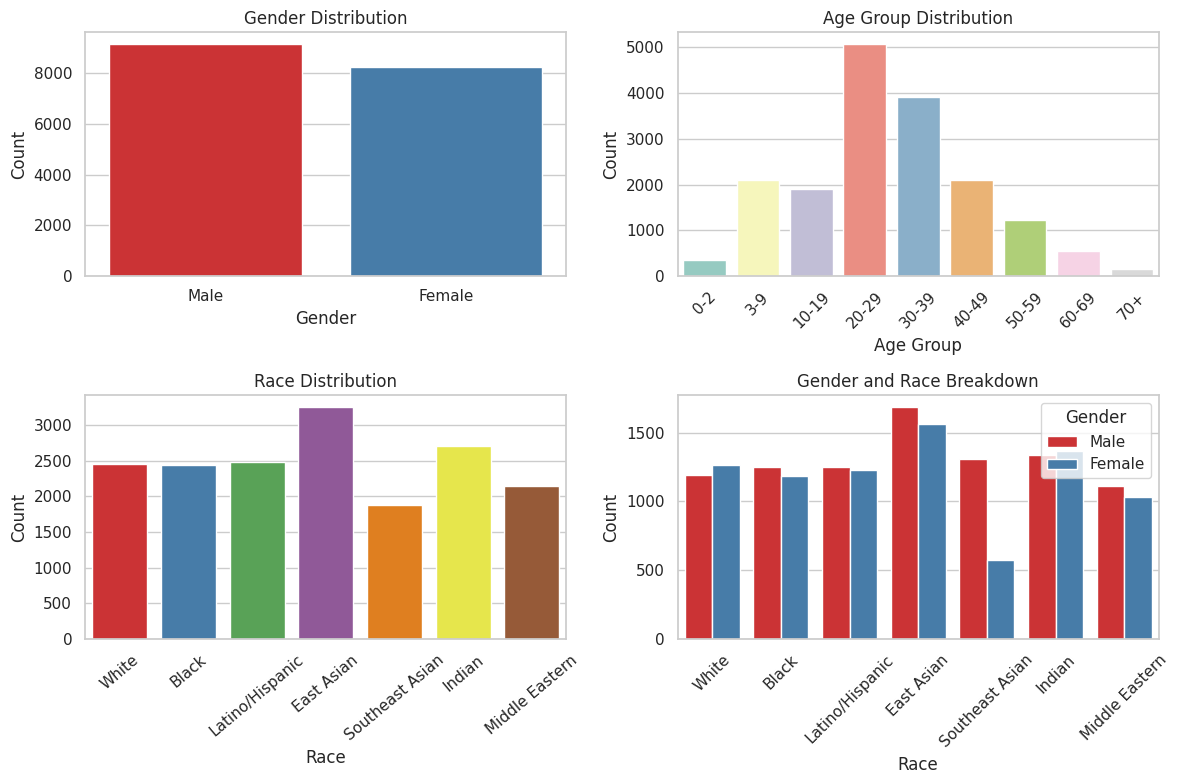

In [25]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load a small fraction of the FairFace dataset
dataset = load_dataset("HuggingFaceM4/FairFace", "0.25", split="train[:20%]")

df = pd.DataFrame({key: dataset[key] for key in dataset.features.keys()})

# Set up plot aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# 1. Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x="gender", palette="Set1")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])

# 2. Age Group Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x="age", palette="Set3")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xticks(
    ticks=range(len(df["age"].unique())),  # adjust if age is numeric
    labels=["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]
)

# 3. Race Distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df, x="race", palette="Set1")
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=40)
plt.xticks(
    ticks=range(len(df["race"].unique())),
    labels=["White", "Black", "Latino/Hispanic", "East Asian", "Southeast Asian", "Indian", "Middle Eastern"]
)

# 4. Gender and Race Breakdown
plt.subplot(2, 2, 4)
sns.countplot(data=df, x="race", hue="gender", palette="Set1")
plt.title("Gender and Race Breakdown")
plt.xlabel("Race")
plt.ylabel("Count")
# plt.legend(title="Gender")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.xticks(rotation=45)
plt.xticks(
    ticks=range(len(df["race"].unique())),
    labels=["White", "Black", "Latino/Hispanic", "East Asian", "Southeast Asian", "Indian", "Middle Eastern"]
)

plt.tight_layout()
plt.show()


Text(46.25, 0.5, 'Race')

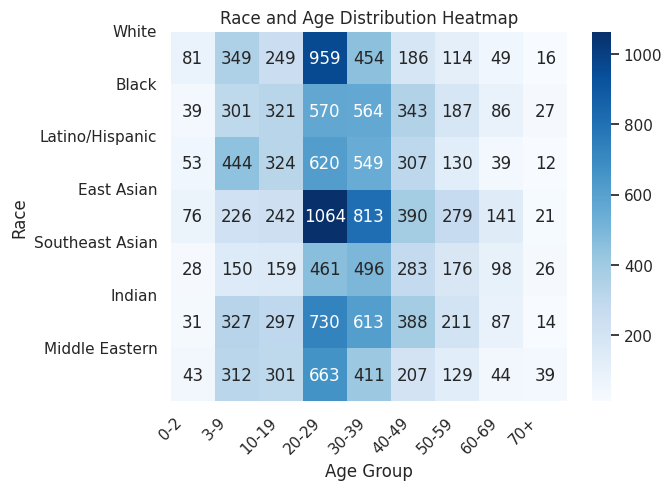

In [33]:
# 2. Race and Age Distribution Heatmap

# Create a pivot table for heatmap
heatmap_data = df.groupby(["race", "age"]).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="d", cbar=True)
plt.title("Race and Age Distribution Heatmap")
plt.xticks(
    ticks=range(len(heatmap_data.columns)),
    labels=["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"],
    rotation=45
)
plt.yticks(
    ticks=range(len(heatmap_data.index)),
    labels=["White", "Black", "Latino/Hispanic", "East Asian", "Southeast Asian", "Indian", "Middle Eastern"],
    rotation=0
)
plt.xlabel("Age Group")
plt.ylabel("Race")

<ipython-input-35-91eb1ed9070b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="race", y="age", palette="Set1")


([<matplotlib.axis.XTick at 0x7c779226f130>,
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Latino/Hispanic'),
  Text(3, 0, 'East Asian'),
  Text(4, 0, 'Southeast Asian'),
  Text(5, 0, 'Indian'),
  Text(6, 0, 'Middle Eastern')])

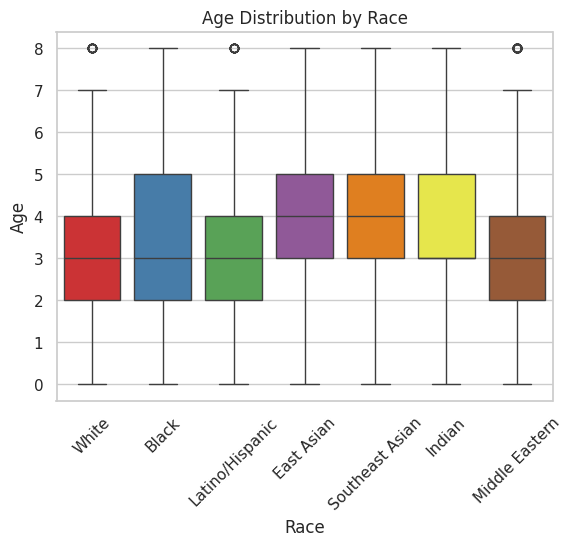

In [35]:
#Age Distribution by Race (Boxplot)

sns.boxplot(data=df, x="race", y="age", palette="Set1")
plt.title("Age Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.xticks(
    ticks=range(len(df["race"].unique())),
    labels=["White", "Black", "Latino/Hispanic", "East Asian", "Southeast Asian", "Indian", "Middle Eastern"]
)


In [36]:
%cd /content/Mitigating_Bias_in_Facial_Recognition_using_Seldonian_Framework
!git add .
!git commit -m "Sync data from Google Colab"
!git push origin main

/content/Mitigating_Bias_in_Facial_Recognition_using_Seldonian_Framework
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
